# **Avacado AveragePrice Prediction Model**

**Getting Started**

**Problem Statement:**


Avocado is a fruit consumed by people heavily in the United States. 

**Content**


This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

**Some relevant columns in the dataset:**

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


In [1]:
from google.colab import  drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# Import all needed python libraries and Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [90]:
# Reading the CSV file from the Avocado dataset .

AV = pd.read_csv("/content/drive/MyDrive/Python_Datasets/avocado.csv")

In [5]:
# Examining the Data

AV

Unnamed: 0        Date  ...  year            region
0               0  2015-12-27  ...  2015            Albany
1               1  2015-12-20  ...  2015            Albany
2               2  2015-12-13  ...  2015            Albany
3               3  2015-12-06  ...  2015            Albany
4               4  2015-11-29  ...  2015            Albany
...           ...         ...  ...   ...               ...
18244           7  2018-02-04  ...  2018  WestTexNewMexico
18245           8  2018-01-28  ...  2018  WestTexNewMexico
18246           9  2018-01-21  ...  2018  WestTexNewMexico
18247          10  2018-01-14  ...  2018  WestTexNewMexico
18248          11  2018-01-07  ...  2018  WestTexNewMexico

[18249 rows x 14 columns]

In [6]:
# Display all Columns or attribute of the Dataset

AV.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# Display top 5 rows

AV.head()

Unnamed: 0        Date  AveragePrice  ...          type  year  region
0           0  2015-12-27          1.33  ...  conventional  2015  Albany
1           1  2015-12-20          1.35  ...  conventional  2015  Albany
2           2  2015-12-13          0.93  ...  conventional  2015  Albany
3           3  2015-12-06          1.08  ...  conventional  2015  Albany
4           4  2015-11-29          1.28  ...  conventional  2015  Albany

[5 rows x 14 columns]

In [8]:
# Display information about the Dataset

AV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**Observation :**

1.here are both numerical and categorical values of int,float and object type .

2.Avearage Price is our Target Variable which is continous in Type

In [91]:
# Changing Object Type variables to Categorical Type 

cols = ['Date','type','region']

for col in cols:
  AV[col] = AV[col].astype('category')

In [10]:
AV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Unnamed: 0    18249 non-null  int64   
 1   Date          18249 non-null  category
 2   AveragePrice  18249 non-null  float64 
 3   Total Volume  18249 non-null  float64 
 4   4046          18249 non-null  float64 
 5   4225          18249 non-null  float64 
 6   4770          18249 non-null  float64 
 7   Total Bags    18249 non-null  float64 
 8   Small Bags    18249 non-null  float64 
 9   Large Bags    18249 non-null  float64 
 10  XLarge Bags   18249 non-null  float64 
 11  type          18249 non-null  category
 12  year          18249 non-null  int64   
 13  region        18249 non-null  category
dtypes: category(3), float64(9), int64(2)
memory usage: 1.6 MB


In [11]:
# Describe the Data

AV.describe()

Unnamed: 0  AveragePrice  ...    XLarge Bags          year
count  18249.000000  18249.000000  ...   18249.000000  18249.000000
mean      24.232232      1.405978  ...    3106.426507   2016.147899
std       15.481045      0.402677  ...   17692.894652      0.939938
min        0.000000      0.440000  ...       0.000000   2015.000000
25%       10.000000      1.100000  ...       0.000000   2015.000000
50%       24.000000      1.370000  ...       0.000000   2016.000000
75%       38.000000      1.660000  ...     132.500000   2017.000000
max       52.000000      3.250000  ...  551693.650000   2018.000000

[8 rows x 11 columns]

**Observation :**

There is a very minute difference between mean and median of every numerical attributes .

In [12]:
# Shape of the Dataset

AV.shape

(18249, 14)

**Observation :**

There are 18249 rows and 14 columns in the Dataset .

In [13]:
# Inspect all Columns 

pd.options.display.max_columns = 15
AV.sample(5).transpose()

9909        17249         6820          2252        9342 
Unnamed: 0             3          17            38            16           8
Date          2015-12-06  2017-09-03    2017-04-09    2015-09-06  2015-11-01
AveragePrice         1.6        2.93          1.01          1.17         1.3
Total Volume     71502.7     3047.66   2.99325e+06        459794     7166.04
4046              7269.3      181.79        957440        167782       14.71
4225             53935.3     1194.91        408516        155469      574.96
4770                3.12           0        106826       12346.6           0
Total Bags         10295     1670.96   1.52046e+06        124196     6576.37
Small Bags       5915.04      452.22   1.46039e+06        124129     6093.84
Large Bags       4379.98     1218.74       10162.6         61.97      482.53
XLarge Bags            0           0       49907.3          4.98           0
type             organic     organic  conventional  conventional     organic
year                2015        2017          2017          2015        2015
region        GreatLakes     Spokane    LosAngeles       Seattle      Boston

In [14]:
# Checking for Null Values in the Dataset 

AV.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**Observation :**

There are no null values in the Dataset.

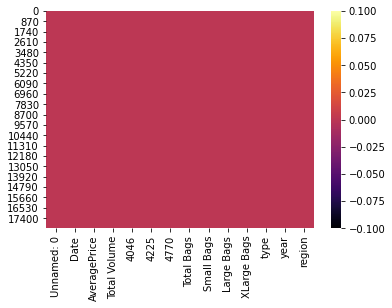

In [15]:
# Checking for Null Values by passing a HeatMap function 

sns.heatmap(AV.isnull(),cmap ='inferno')

In [16]:
# Checking for Unique values in all columns 

for col in AV.columns.values:
  print("Number of Unique Values of {} : {}".format(col,AV[col].nunique()))

Number of Unique Values of Unnamed: 0 : 53
Number of Unique Values of Date : 169
Number of Unique Values of AveragePrice : 259
Number of Unique Values of Total Volume : 18237
Number of Unique Values of 4046 : 17702
Number of Unique Values of 4225 : 18103
Number of Unique Values of 4770 : 12071
Number of Unique Values of Total Bags : 18097
Number of Unique Values of Small Bags : 17321
Number of Unique Values of Large Bags : 15082
Number of Unique Values of XLarge Bags : 5588
Number of Unique Values of type : 2
Number of Unique Values of year : 4
Number of Unique Values of region : 54


**Observation :**

There are no useless features in the Dataset .

**Lets Check some Features of Avarage Price**

In [17]:
#Mean price

AV['AveragePrice'].mean()

1.4059784097758825

In [18]:
#Minimum price of Avacado

AV['AveragePrice'].min()

0.44

In [19]:
#Maximum Price of Avacado

AV['AveragePrice'].max()

3.25

# **EDA(Exploratory Data Analysis)**

**1.Univariant Analysis**

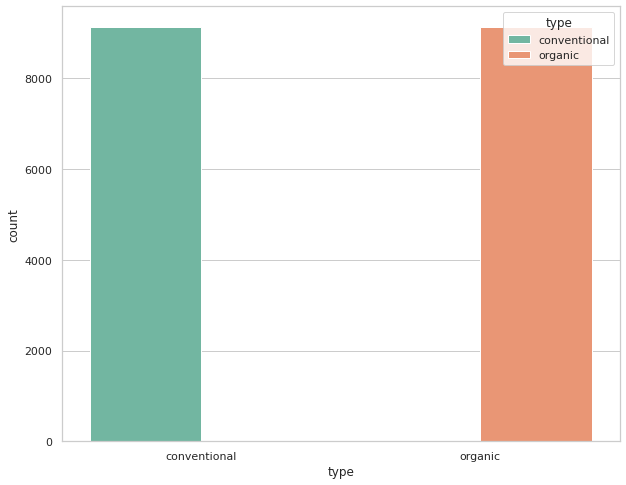

In [20]:
# Plotting Type Distribution 

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sns.countplot(x='type',data=AV,hue='type',saturation=0.75,palette="Set2")
plt.show()

**Observation :**

Data is normaly distributed in type attribute

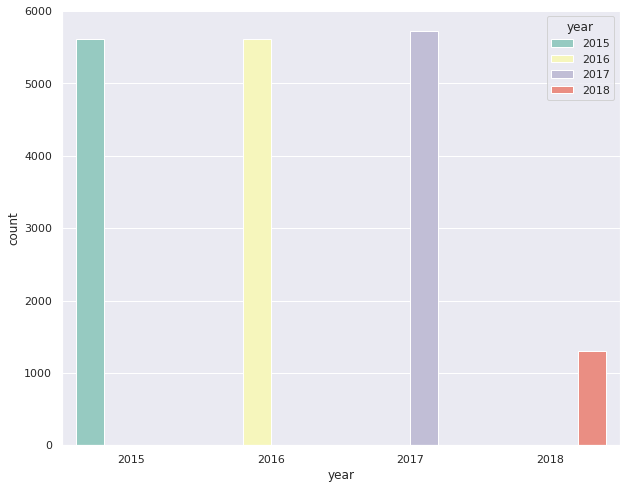

In [21]:
# Plotting Year Distribution 

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x='year',data = AV,hue='year',saturation=0.75,palette="Set3")
plt.show()

**Observation :**

2017 is the highest avocado producing year .

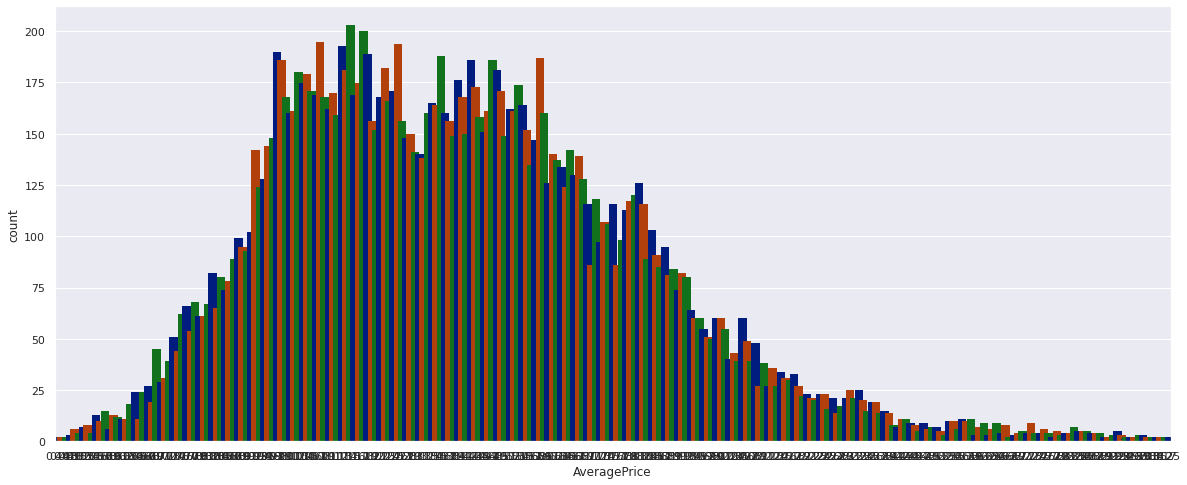

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(AV.AveragePrice,color='y',facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.show()

**Observation :**

It seems that we have two peaks in our distribution . This could be due to different types of Avocado .

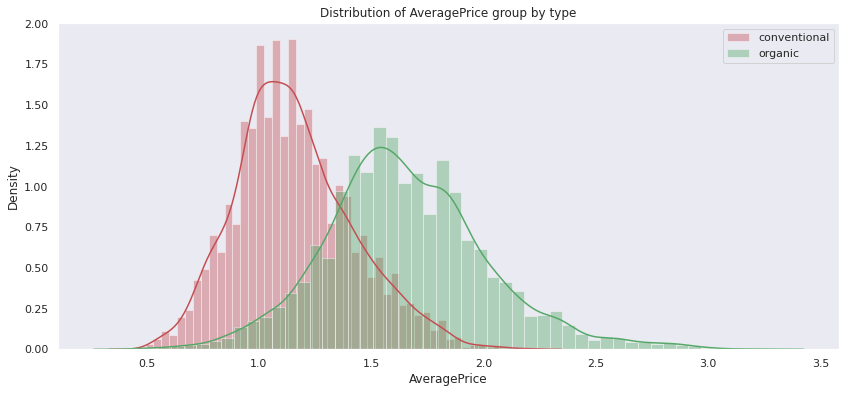

In [23]:
#Distribution of average price grouped by types

plt.figure(figsize=(14,6))

sns.distplot(AV['AveragePrice'][AV['type'] == 'conventional'],color = 'r',label='conventional')
sns.distplot(AV['AveragePrice'][AV['type'] == 'organic'],color='g',label='organic')

plt.legend()
plt.grid()
plt.title('Distribution of AveragePrice group by type')
plt.show()

**Observation :**

Average price of organic avacado is much greater than and more wide range than coventional avacado .

Distplot to view skewness of numerical columns 

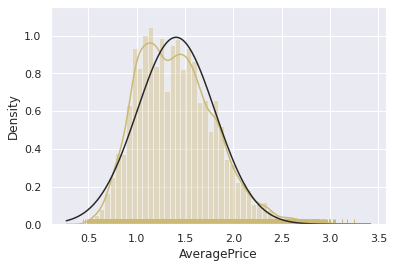

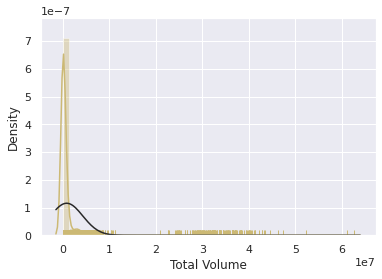

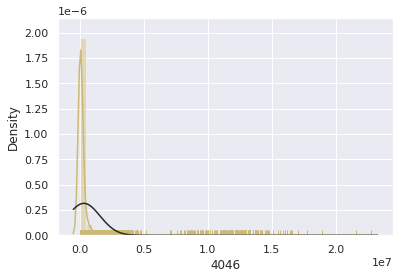

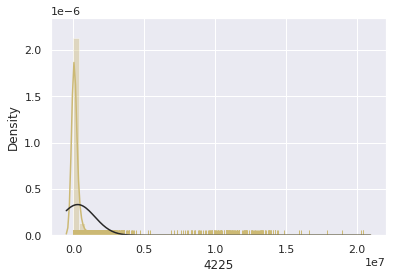

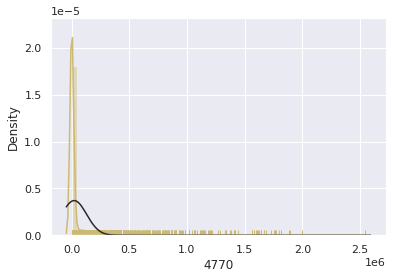

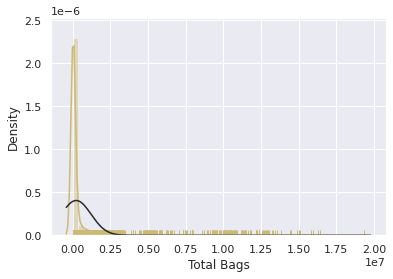

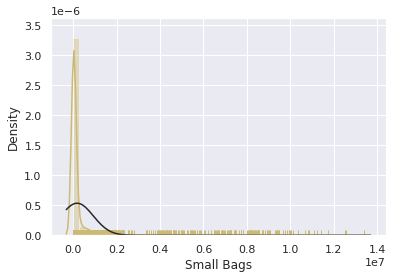

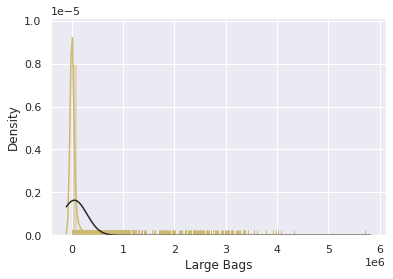

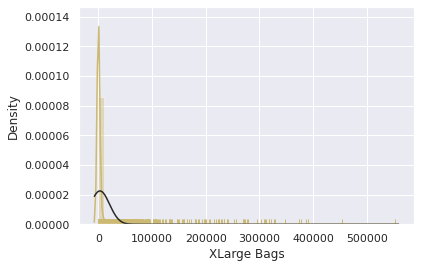

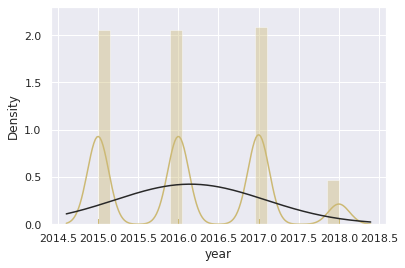

In [24]:
COL = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']

from scipy.stats import norm

for i in COL:
  sns.distplot(AV[i], rug=True,color='y',fit=norm)
  plt.show()

**Observation :**

From the above chart we can see the data is not normally distributed except average price data,hence we will check the level of skewness with each attribute and remove the outliers to make further analysis

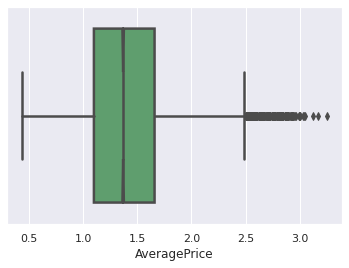

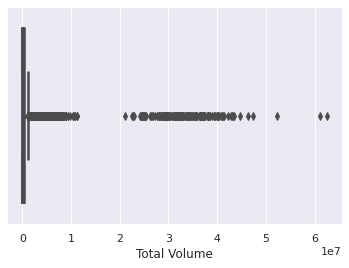

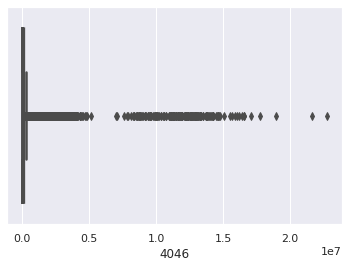

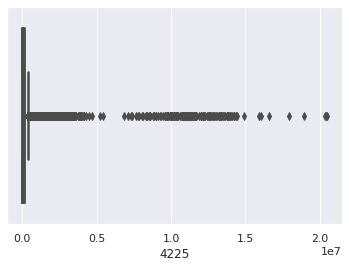

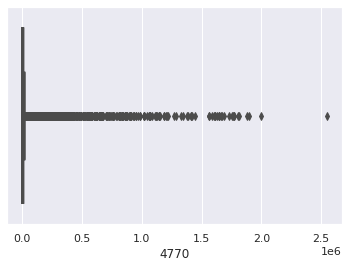

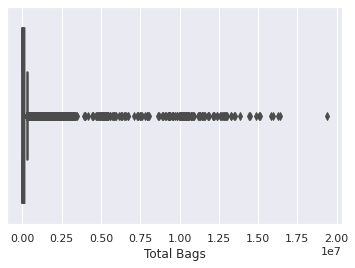

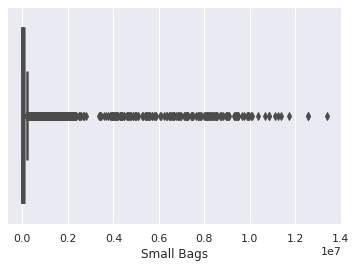

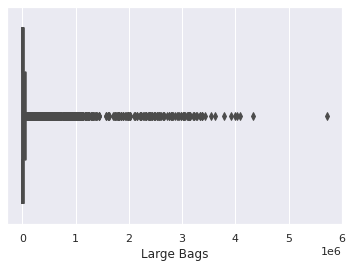

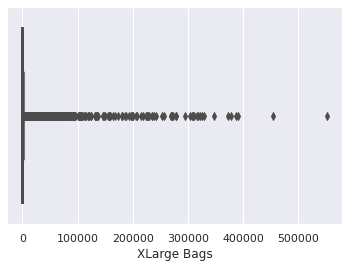

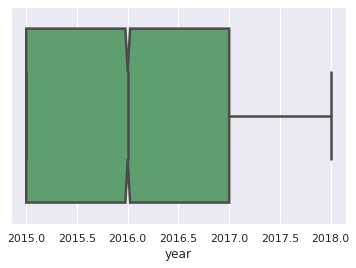

In [25]:
COL = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']

from scipy.stats import norm

for i in COL:
  sns.boxplot(AV[i], notch=True,color='g',linewidth=2.5)
  plt.show()

**Observation :**

There are outliers present in most of the columns except AveragePrice and year .

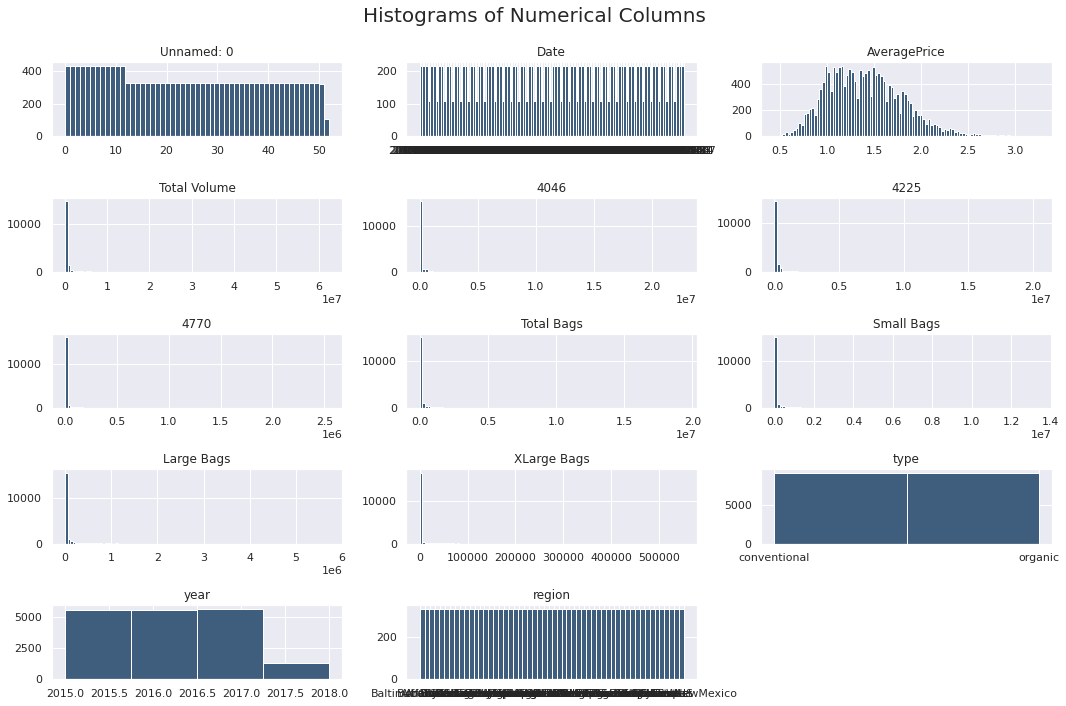

In [26]:
#Histogram for Numerical Columns

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(AV.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(AV.columns.values[i])

    vals = np.size(AV.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(AV.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Performing Label Encoder**

In [27]:
# Performing Label Encoder for categorical Values.

from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
AV['Date'] = Le.fit_transform(AV['Date'])
AV['type'] = Le.fit_transform(AV['type'])
AV['region'] = Le.fit_transform(AV['region'])

In [28]:
AV.head()

Unnamed: 0  Date  AveragePrice  Total Volume     4046       4225    4770  \
0           0    51          1.33      64236.62  1036.74   54454.85   48.16   
1           1    50          1.35      54876.98   674.28   44638.81   58.33   
2           2    49          0.93     118220.22   794.70  109149.67  130.50   
3           3    48          1.08      78992.15  1132.00   71976.41   72.58   
4           4    47          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8696.87     8603.62       93.25          0.0     0  2015       0  
1     9505.56     9408.07       97.49          0.0     0  2015       0  
2     8145.35     8042.21      103.14          0.0     0  2015       0  
3     5811.16     5677.40      133.76          0.0     0  2015       0  
4     6183.95     5986.26      197.69          0.0     0  2015       0

**Bivariant Analysis**

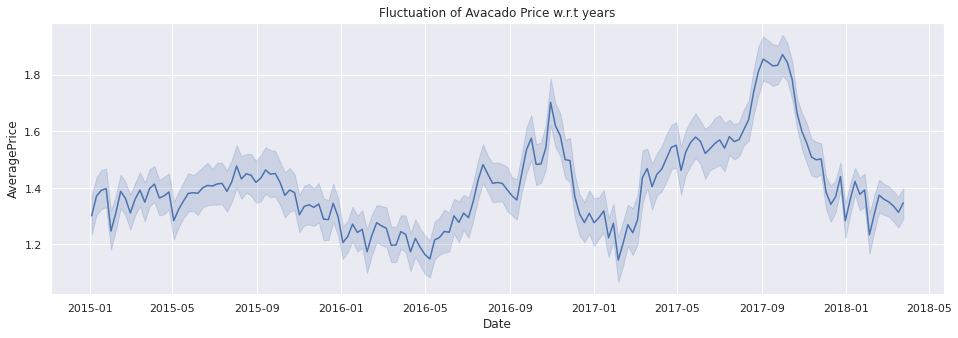

In [95]:
#plotting price ranges in different years 

AV['Date']= pd.to_datetime(AV['Date'],errors='coerce')

plt.figure(figsize=(16,5) )
ax = sns.lineplot(x='Date',y='AveragePrice',data=AV)
plt.title('Fluctuation of Avacado Price w.r.t years')
plt.show()

**Observation :**

AveragePrice going up at the beggining of the year.

These are high drops and high spikes after 2016-04

From start to last Average price increased.

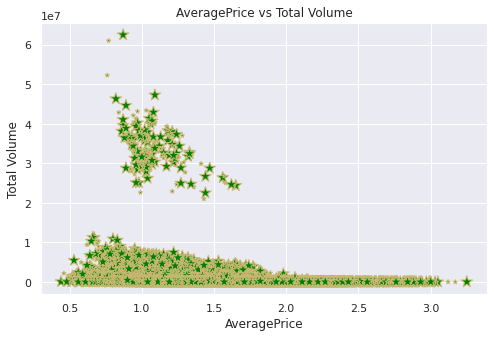

In [29]:
#Scatter_plot showing relation between AveragePrice and Total Volume

plt.figure(figsize=(8,5))
plt.title('AveragePrice vs Total Volume')
plt.scatter(x='AveragePrice',y='Total Volume',data=AV,sizes=(20, 150),edgecolors='y',c='green',marker ="*")
plt.xlabel("AveragePrice")
plt.ylabel("Total Volume")
plt.show()

**Observation :**

The average price per Toatl Volume is spread across the range of Average Price.
The Majority of Total Volume lies under 1,00,00,000.

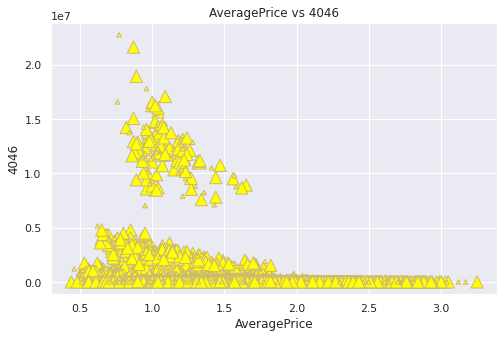

In [30]:
#Scatter_plot showing relation between AveragePrice and 4046

plt.figure(figsize=(8,5))
plt.title('AveragePrice vs 4046')
plt.scatter(x='AveragePrice',y='4046',data=AV,sizes=(20, 150),edgecolors='y',c='yellow',marker ="^")
plt.xlabel("AveragePrice")
plt.ylabel("4046")
plt.show()

**Observation :**

The average price per Total number of avocados with PLU 4046 sold is spread across the range of Average Price.
The Majority of PLU 4046 lies under 50,00,000.

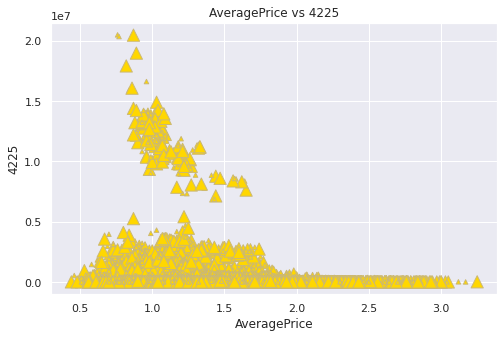

In [31]:
#Scatter_plot showing relation between AveragePrice and 4225

plt.figure(figsize=(8,5))
plt.title('AveragePrice vs 4225')
plt.scatter(x='AveragePrice',y='4225',data=AV,sizes=(20, 150),edgecolors='y',c='gold',marker ="^")
plt.xlabel("AveragePrice")
plt.ylabel("4225")
plt.show()

**Observation :**

The average price per Total number of avocados with PLU 4225 sold is spread across the range of Average Price.
The Majority of PLU 4225 lies under 25,00,000.

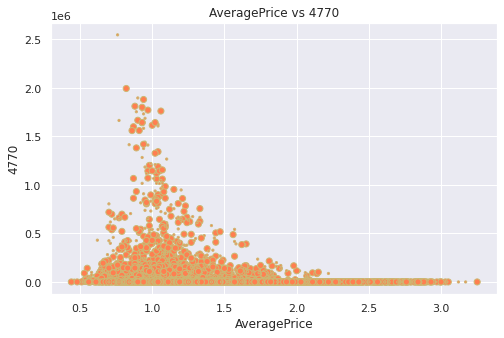

In [32]:
#Scatter_plot showing relation between AveragePrice and 4770

plt.figure(figsize=(8,5))
plt.title('AveragePrice vs 4770')
plt.scatter(x='AveragePrice',y='4770',data=AV,sizes=(20, 150),edgecolors='y',c='coral',marker =".")
plt.xlabel("AveragePrice")
plt.ylabel("4770")
plt.show()

**Observation :**

The average price per Total number of avocados with PLU 4770 sold is spread across the range of Average Price.
The Majority of PLU 4770 lies under 4,00,000.

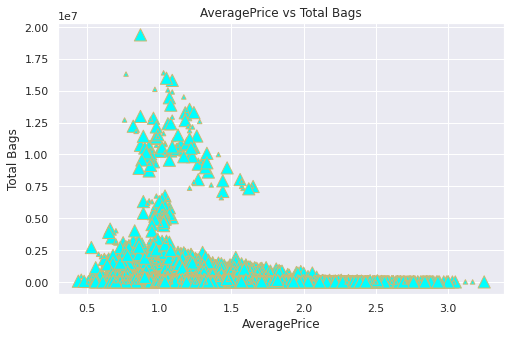

In [33]:
#Scatter_plot showing relation between AveragePrice and Total Bags

plt.figure(figsize=(8,5))
plt.title('AveragePrice vs Total Bags')
plt.scatter(x='AveragePrice',y='Total Bags',data=AV,sizes=(20, 150),edgecolors='y',c='cyan',marker ="^")
plt.xlabel("AveragePrice")
plt.ylabel("Total Bags")
plt.show()

**Observation :**


The average price per Total Bags is spread across the range of Average Price.
The Majority of Bags prices lies under 30,00,000

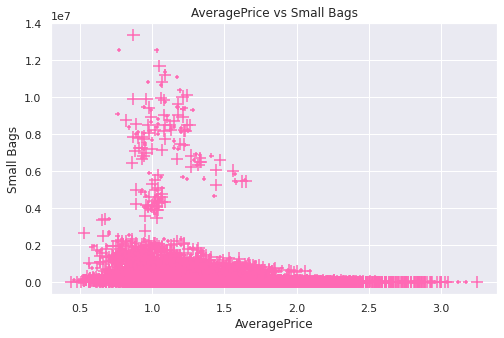

In [34]:
#Scatter_plot showing relation between AveragePrice and Small Bags

plt.figure(figsize=(8,5))
plt.title('AveragePrice vs Small Bags')
plt.scatter(x='AveragePrice',y='Small Bags',data=AV,sizes=(20, 150),edgecolors='y',c='hotpink',marker ="+")
plt.xlabel("AveragePrice")
plt.ylabel("Small Bags")
plt.show()

**Observation :**

The average price per Small Bags is spread across the range of Average Price.
The Majority of Small Bags lies under 20,00,000.

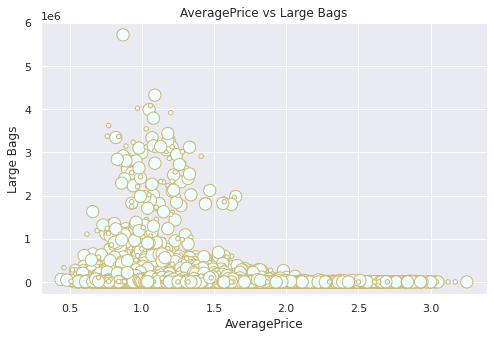

In [35]:
#Scatter_plot showing relation between AveragePrice and Large Bags

plt.figure(figsize=(8,5))
plt.title('AveragePrice vs Large Bags')
plt.scatter(x='AveragePrice',y='Large Bags',data=AV,sizes=(20, 150),edgecolors='y',c='azure',marker ="o")
plt.xlabel("AveragePrice")
plt.ylabel("Large Bags")
plt.show()

**Observation :**

The average price per Large Bags is spread across the range of Average Price.
The Majority of Large Bags lies under 4,00,000.

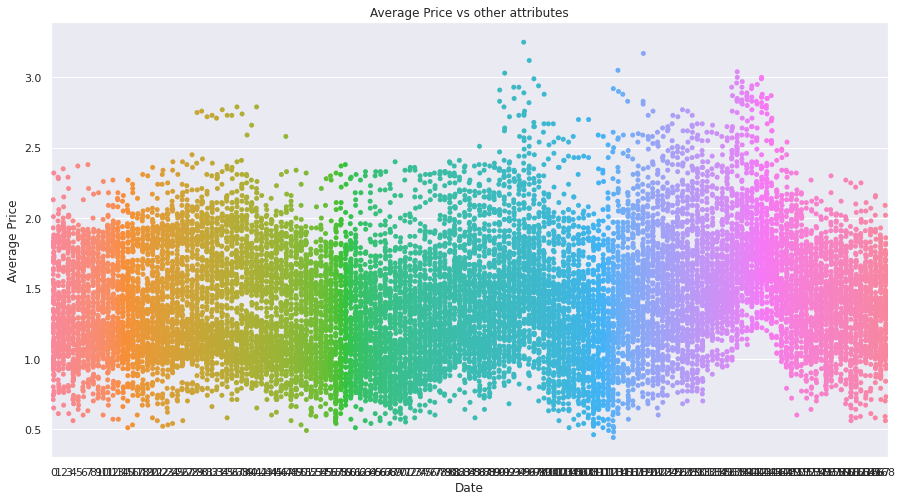

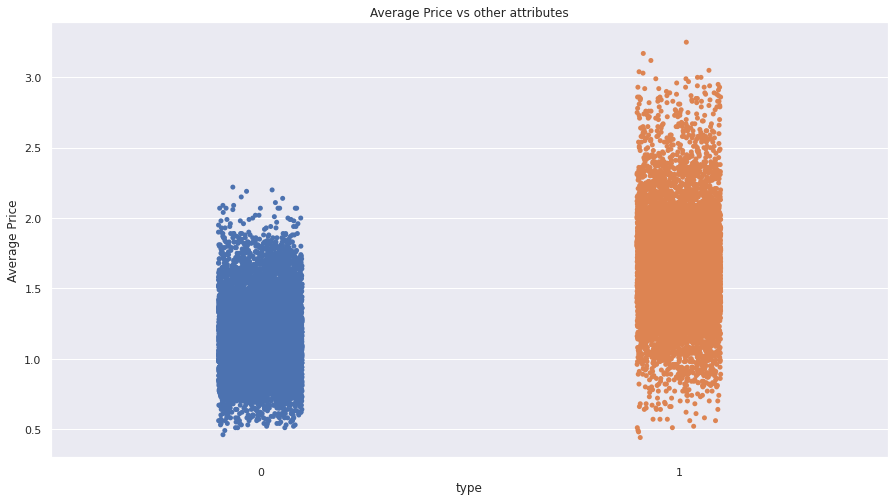

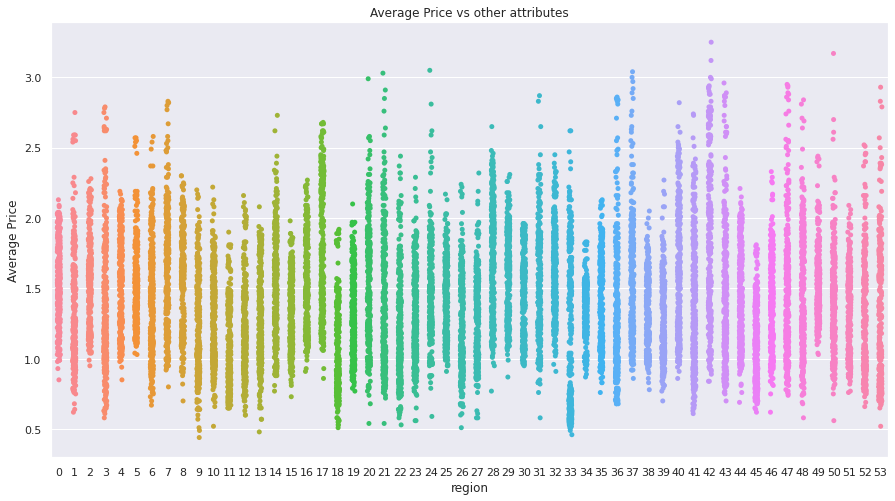

In [36]:
COL = ['Date','type','region']

for i in COL:                                        
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(AV[i], AV['AveragePrice'])
    ax.set(xlabel = i, ylabel = 'Average Price')
    plt.title('Average Price vs other attributes')
    plt.show()

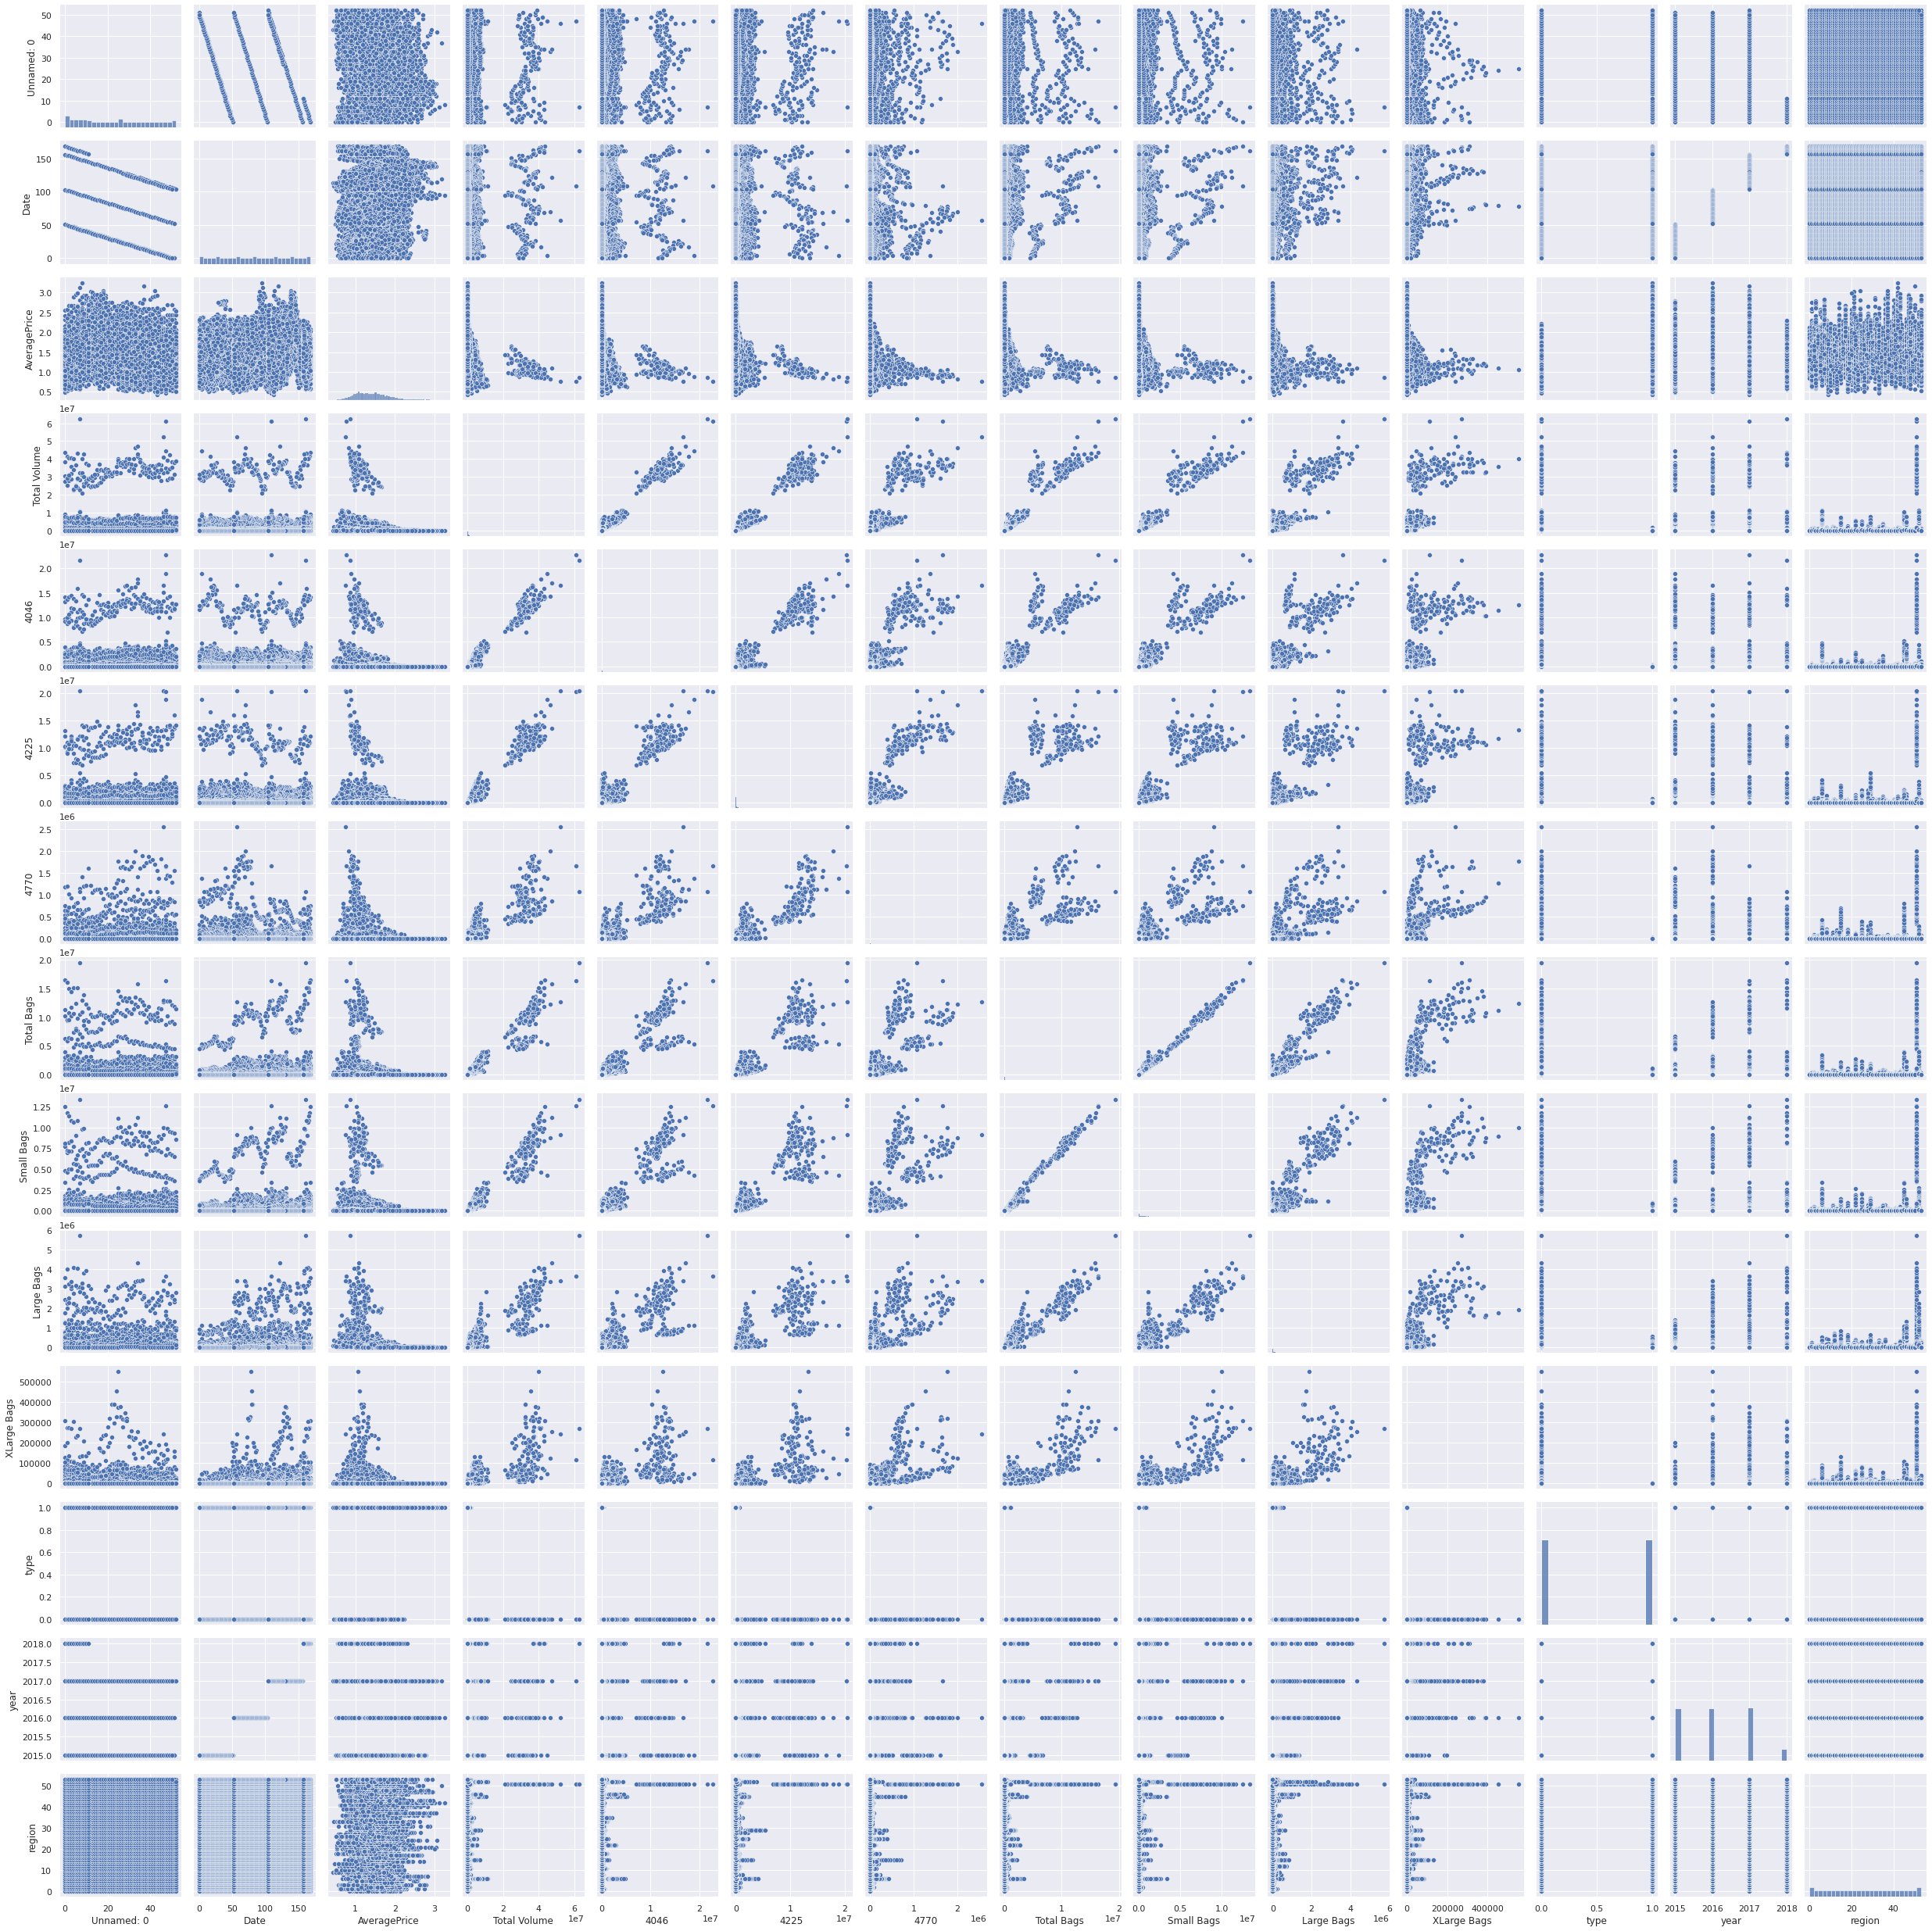

In [37]:
sns.pairplot(AV)

In [38]:
# Checking Correlation between Attributes 

cor = AV.corr()
cor

Unnamed: 0      Date  AveragePrice  Total Volume      4046  \
Unnamed: 0      1.000000 -0.419926     -0.133008      0.014035  0.017628   
Date           -0.419926  1.000000      0.145514      0.009263 -0.005028   
AveragePrice   -0.133008  0.145514      1.000000     -0.192752 -0.208317   
Total Volume    0.014035  0.009263     -0.192752      1.000000  0.977863   
4046            0.017628 -0.005028     -0.208317      0.977863  1.000000   
4225            0.019829 -0.016895     -0.172928      0.974181  0.926110   
4770            0.041752 -0.047517     -0.179446      0.872202  0.833389   
Total Bags     -0.002219  0.064688     -0.177088      0.963047  0.920057   
Small Bags      0.000347  0.056902     -0.174730      0.967238  0.925280   
Large Bags     -0.009196  0.081855     -0.172940      0.880640  0.838645   
XLarge Bags    -0.011546  0.077374     -0.117592      0.747157  0.699377   
type           -0.000288 -0.000060      0.615845     -0.232434 -0.225819   
year           -0.171667  0.950274      0.093197      0.017193  0.003353   
region         -0.000489 -0.000101     -0.011716      0.174176  0.192073   

                  4225      4770  Total Bags  Small Bags  Large Bags  \
Unnamed: 0    0.019829  0.041752   -0.002219    0.000347   -0.009196   
Date         -0.016895 -0.047517    0.064688    0.056902    0.081855   
AveragePrice -0.172928 -0.179446   -0.177088   -0.174730   -0.172940   
Total Volume  0.974181  0.872202    0.963047    0.967238    0.880640   
4046          0.926110  0.833389    0.920057    0.925280    0.838645   
4225          1.000000  0.887855    0.905787    0.916031    0.810015   
4770          0.887855  1.000000    0.792314    0.802733    0.698471   
Total Bags    0.905787  0.792314    1.000000    0.994335    0.943009   
Small Bags    0.916031  0.802733    0.994335    1.000000    0.902589   
Large Bags    0.810015  0.698471    0.943009    0.902589    1.000000   
XLarge Bags   0.688809  0.679861    0.804233    0.806845    0.710858   
type         -0.232289 -0.210027   -0.217788   -0.220535   -0.193177   
year         -0.009559 -0.036531    0.071552    0.063915    0.087891   
region        0.145726  0.095252    0.175256    0.164702    0.198768   

              XLarge Bags      type      year    region  
Unnamed: 0      -0.011546 -0.000288 -0.171667 -0.000489  
Date             0.077374 -0.000060  0.950274 -0.000101  
AveragePrice    -0.117592  0.615845  0.093197 -0.011716  
Total Volume     0.747157 -0.232434  0.017193  0.174176  
4046             0.699377 -0.225819  0.003353  0.192073  
4225             0.688809 -0.232289 -0.009559  0.145726  
4770             0.679861 -0.210027 -0.036531  0.095252  
Total Bags       0.804233 -0.217788  0.071552  0.175256  
Small Bags       0.806845 -0.220535  0.063915  0.164702  
Large Bags       0.710858 -0.193177  0.087891  0.198768  
XLarge Bags      1.000000 -0.175483  0.081033  0.082281  
type            -0.175483  1.000000 -0.000032 -0.000280  
year             0.081033 -0.000032  1.000000 -0.000055  
region           0.082281 -0.000280 -0.000055  1.000000

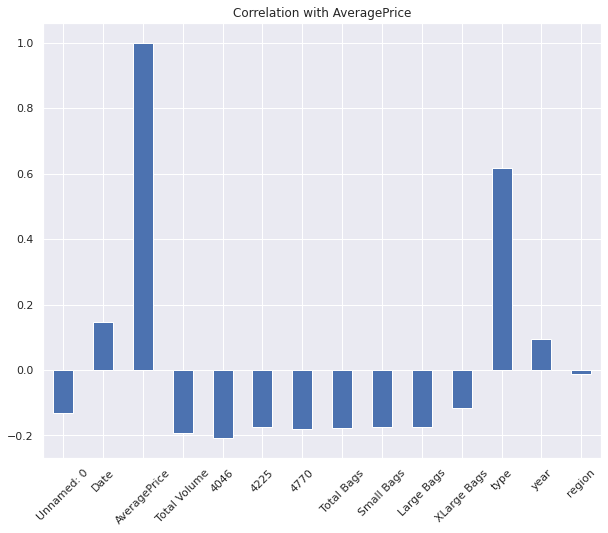

In [39]:
#Correlation of Average Price with other attributes

AV.corrwith(AV.AveragePrice).plot.bar(figsize=(10,8),title = 'Correlation with AveragePrice',rot=45,grid=True)

**Observation :**

4046, Large Bags and Year have some corelation with Avergae but at very low level

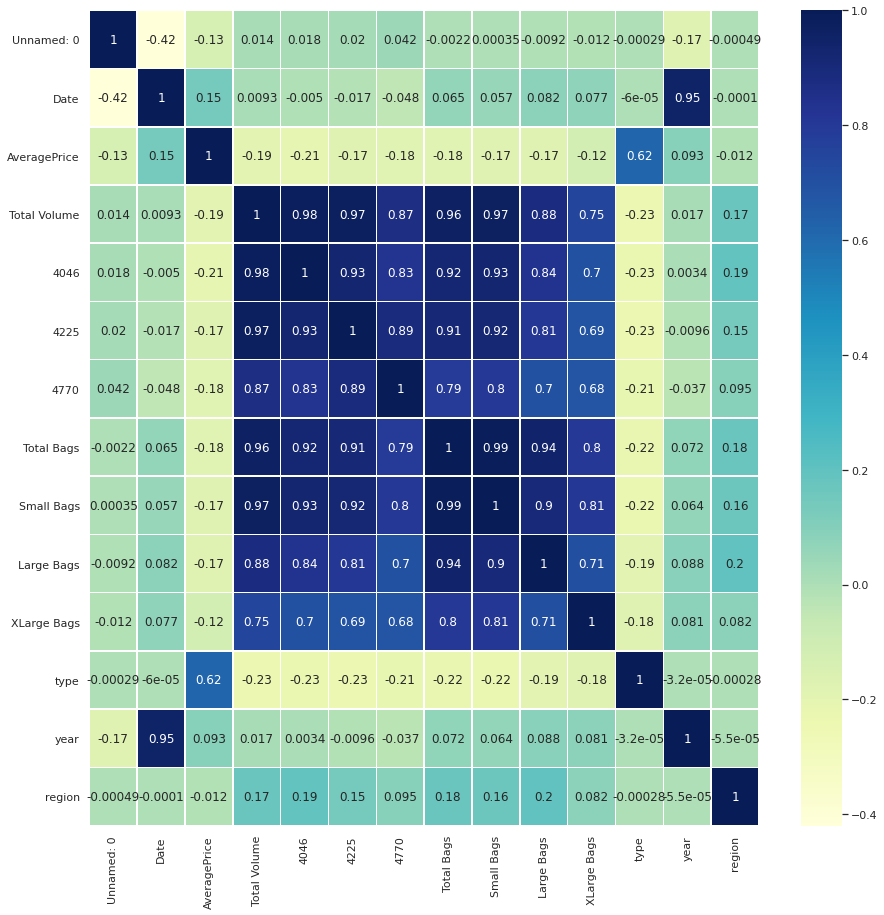

In [40]:
# Plotting Heatmap to show Correlation between Variables

plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,linewidths=.5,cmap="YlGnBu")
plt.show()

**Observation :**


Most of the columns have negative correlation with Average Price.

4046 seems to have highest correlation with Average Price at -0.19 followed by large bags at -0.18.

Total volume, 4046, 4225, 4770, Total bags, small bags and large bags all have high correlation amongst them as seen in the heatmap.

In [41]:
cor['AveragePrice'].sort_values(ascending=False)  #Display Coorelation values of all attributes

AveragePrice    1.000000
type            0.615845
Date            0.145514
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
Unnamed: 0     -0.133008
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

# **Data Cleaning**

**1.Checking Null Values**

In [42]:
AV.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

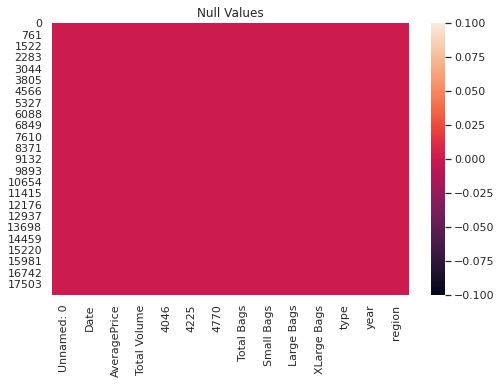

In [43]:
#Plotting Null Values

plt.figure(figsize=[8,5])
sns.heatmap(AV.isnull())
plt.title("Null Values")
plt.show()

**Observation :**

This is a very clean Dataset .

**2.Checking for Outliers**

Unnamed: 0          AxesSubplot(0.125,0.71587;0.168478x0.16413)
Date             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
AveragePrice     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4046               AxesSubplot(0.125,0.518913;0.168478x0.16413)
4225            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
4770            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Small Bags         AxesSubplot(0.125,0.321957;0.168478x0.16413)
Large Bags      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
XLarge Bags     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
type            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
year                  AxesSubplot(0.125,0.125;0.168478x0.16413)
region             AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

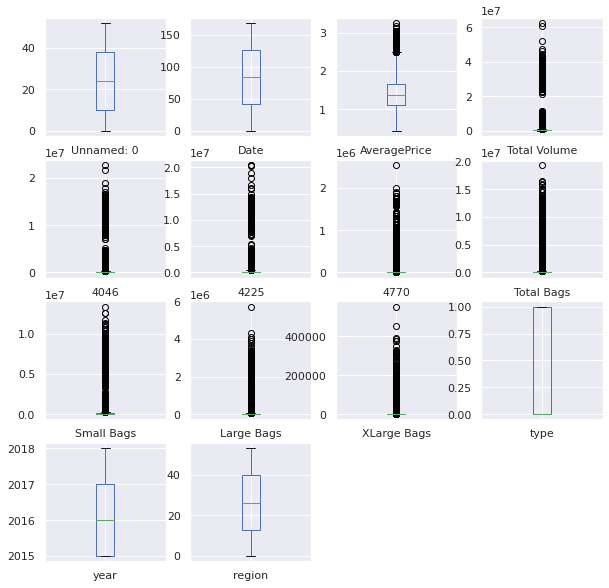

In [75]:
#Plotting Outliers
AV.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

Lets remove those outliers in the above shown plotting .

In [44]:
#Compute Outliers using zscore method

from scipy.stats import  zscore
z=np.abs(zscore(AV))
new_AV = AV[(z<3).all(axis=1)]

In [45]:
AV.shape

(18249, 14)

In [46]:
new_AV.shape

(17651, 14)

In [47]:
#Checking Outliers Percentage

((18249-17651)/18249)*100

3.276891884486821

**Observation :**

 There will be a loss of 3.27% of data from the dataset which is very much affordable .

**3.Checking for Skewness**

In [48]:
new_AV.skew()

Unnamed: 0      0.106116
Date            0.013714
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

Skewness is present in some columns . Lets remove it .

In [49]:
#Using PowerTransformer to remove skewness

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
for i in new_AV.skew().index[1:]:
    if new_AV.skew().loc[i]>0.55:
        new_AV[i]=pt.fit_transform(new_AV[i].values.reshape(-1,1))
    if new_AV.skew().loc[i]<-0.55:
        new_AV[i]=pt.fit_transform(new_AV[i].values.reshape(-1,1))
    else:
        new_AV[i]=new_AV[i]

In [50]:
new_AV.skew()

Unnamed: 0      0.106116
Date            0.013714
AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

**Split Data and Target**

In [51]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the AveragePrice of the Avacado , we will drop the ‘AveragePrice’ column.

X = new_AV.drop('AveragePrice',axis=1)
y = new_AV['AveragePrice']

In [52]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [53]:
X.head()

Unnamed: 0  Date  Total Volume      4046      4225      4770  Total Bags  \
0           0    51     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   
1           1    50     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   
2           2    49      0.205556 -0.731776  0.649333  0.023923   -0.566369   
3           3    48      0.019655 -0.632592  0.468799 -0.121164   -0.713068   
4           4    47     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0   -0.347421   -0.781153    -0.677919     0  2015       0  
1   -0.311322   -0.771198    -0.677919     0  2015       0  
2   -0.374453   -0.758523    -0.677919     0  2015       0  
3   -0.510991   -0.699123    -0.677919     0  2015       0  
4   -0.490534   -0.607027    -0.677919     0  2015       0

In [54]:
X['XLarge Bags'] = X['XLarge Bags'].fillna(X['XLarge Bags'].mean())

In [55]:
X.head()

Unnamed: 0  Date  Total Volume      4046      4225      4770  Total Bags  \
0           0    51     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   
1           1    50     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   
2           2    49      0.205556 -0.731776  0.649333  0.023923   -0.566369   
3           3    48      0.019655 -0.632592  0.468799 -0.121164   -0.713068   
4           4    47     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0   -0.347421   -0.781153    -0.677919     0  2015       0  
1   -0.311322   -0.771198    -0.677919     0  2015       0  
2   -0.374453   -0.758523    -0.677919     0  2015       0  
3   -0.510991   -0.699123    -0.677919     0  2015       0  
4   -0.490534   -0.607027    -0.677919     0  2015       0

**Scalling**

In [56]:
#Scale the Data using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [57]:
X.head()

Unnamed: 0      Date  Total Volume      4046      4225      4770  \
0   -1.564303 -0.664946     -0.075324 -0.657421  0.351430 -0.222566   
1   -1.499806 -0.685424     -0.147497 -0.777179  0.269513 -0.175223   
2   -1.435310 -0.705902      0.205556 -0.731776  0.649333  0.023923   
3   -1.370814 -0.726380      0.019655 -0.632592  0.468799 -0.121164   
4   -1.306318 -0.746858     -0.180674 -0.684504  0.262126 -0.110491   

   Total Bags  Small Bags  Large Bags  XLarge Bags      type      year  \
0   -0.537507   -0.347421   -0.781153    -0.677919 -1.019047 -1.210013   
1   -0.498128   -0.311322   -0.771198    -0.677919 -1.019047 -1.210013   
2   -0.566369   -0.374453   -0.758523    -0.677919 -1.019047 -1.210013   
3   -0.713068   -0.510991   -0.699123    -0.677919 -1.019047 -1.210013   
4   -0.686312   -0.490534   -0.607027    -0.677919 -1.019047 -1.210013   

     region  
0 -1.695495  
1 -1.695495  
2 -1.695495  
3 -1.695495  
4 -1.695495

**Finding Best Random State**

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

maxr2score = 0
maxRS = 0

for i in range (1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.5867224784075001 on Random State 500


**Preparation of Test and Train Data**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = maxRS)

# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

# **Building Model**

In [60]:
#Importing Packages

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

**Regression_Models**

In [61]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
GBR = GradientBoostingRegressor()
KN = KNeighborsRegressor()
RD = Ridge()
SV = SVR()

In [62]:
Models = [LR,DT,RF,GBR,KN,RD,SV]

for m in Models:
  print(m)
  print("\n")
  m.fit(x_train,y_train)
  pred = m.predict(x_test)
  print("r2_score is :",r2_score(y_test,pred))
  print("Mean_Squared_Error is :",mean_squared_error(y_test,pred))
  print("Mean_Absolute_Error is :",mean_absolute_error(y_test,pred))
  print("Root_Mean_Squared_Error is:",np.sqrt(mean_squared_error(y_test,pred)))
  print("\n\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2_score is : 0.5867224784075001
Mean_Squared_Error is : 0.06333024714036188
Mean_Absolute_Error is : 0.19847116706699464
Root_Mean_Squared_Error is: 0.2516550161239825



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


r2_score is : 0.7829504637015167
Mean_Squared_Error is : 0.03326046072507553
Mean_Absolute_Error is : 0.12010951661631418
Root_Mean_Squared_Error is: 0.18237450678500966



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                    

**Observation**

Random Forest Regressor has the highest r2_score of 90.20% and Ridge model has least r2_score of 58.67% , but we have to perform cross_validation score to find the best fitted model for our dataset .

In [63]:
for c in Models:
  cvs = cross_val_score(c,X,y,cv=5)
  print('Cross Validation SCore for',c,'model is :',cvs.mean())
  print('Difference between r2_score and cross validation score is :',r2_score(y_test,pred)-cvs.mean())
  print('\n')

Cross Validation SCore for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) model is : 0.23563355137324588
Difference between r2_score and cross validation score is : 0.5719559213807313


Cross Validation SCore for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') model is : -0.18952416387664828
Difference between r2_score and cross validation score is : 0.9971136366306255


Cross Validation SCore for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0

**Observation :**

Here we see that the difference between r2_score and cross validation score is least in GradientBoostingRegressor .Hence we will use Gradient Boosting Model in Hyper Parameter using Grid Search.

**Hyper-Parameter Tuning**

In [80]:
from sklearn.model_selection import  GridSearchCV

In [81]:
parameter = {'n_estimators': [5,50],
          'max_depth': [2,4],
          'min_samples_split': [2,5],
          'learning_rate': [0.01,0.1]}

In [82]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [84]:
GCV.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 5,
 'n_estimators': 50}

**Building Final Model**

In [86]:
Avacado_Model = GradientBoostingRegressor(learning_rate = 0.1,max_depth = 4,n_estimators = 50,min_samples_split=5)
Avacado_Model.fit(x_train,y_train)
pred=Avacado_Model.predict(x_test)
r2score=r2_score(y_test,pred)
print('R2_score of best fitted model is :',r2score*100)
print('Mean_Squared_error is:',mean_squared_error(y_test,pred))
print('Mean_Absolute_error is :',mean_absolute_error(y_test,pred))
print('Root_Mean_squared_Error is :',np.sqrt(mean_squared_error(y_test,pred)))

R2_score of best fitted model is : 77.2675610851506
Mean_Squared_error is: 0.03483496922438762
Mean_Absolute_error is : 0.14125480224828987
Root_Mean_squared_Error is : 0.1866412848873143


**Our model learnt almost 77.26%**

In [70]:
cvs = cross_val_score(Avacado_Model,X,y,cv=5)
print('Cross validation score of Gradient Boosting Regressor is :',cvs.mean())

Cross validation score of Gradient Boosting Regressor is : 0.40980763129677367


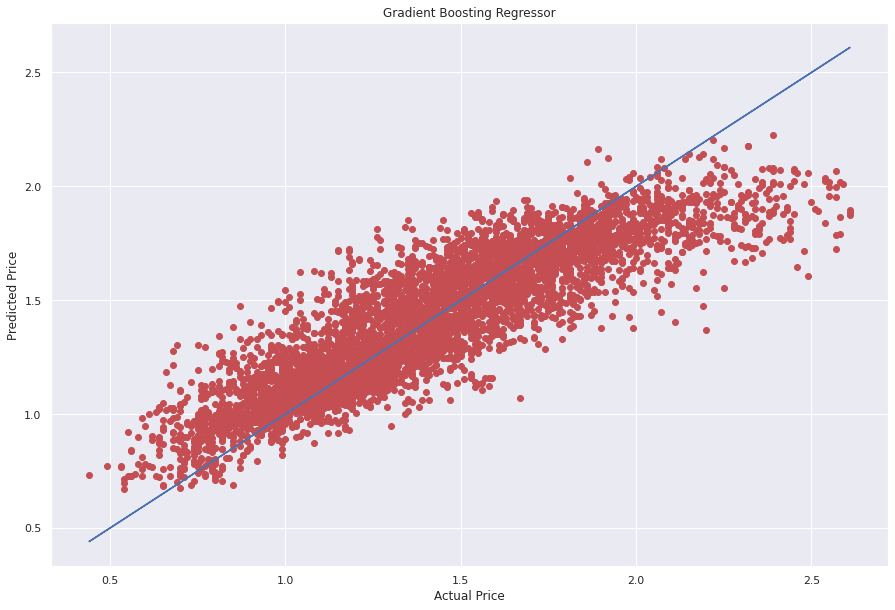

In [71]:
# plotting the Model

plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting Regressor')
plt.show()

The blue straight line represents the actual values while the red dotes are the predicted values

# **Conclusion**

In [72]:
import pickle

Model_Name = 'Avacado_Project.pkl'
pickle.dump(Avacado_Model,open(Model_Name,'wb'))

In [73]:
Final_Model  = pickle.load(open('Avacado_Project.pkl','rb'))
result = Final_Model.score(x_test,y_test)*100
print(result)

77.27113397486255


In [74]:
Prediction = pd.DataFrame([Final_Model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
Prediction

0        1         2        3         4         5         6     \
Predicted  1.832285  1.75078  1.540945  0.72841  1.679851  1.253841  1.255396   
Original   1.832285  1.75078  1.540945  0.72841  1.679851  1.253841  1.255396   

           ...     5289      5290    5291      5292      5293      5294  \
Predicted  ...  1.03292  1.295682  1.1739  1.116623  1.793302  1.308725   
Original   ...  1.03292  1.295682  1.1739  1.116623  1.793302  1.308725   

               5295  
Predicted  1.620392  
Original   1.620392  

[2 rows x 5296 columns]